In [37]:
# qiskit imports:
from qiskit import QuantumCircuit, assemble, Aer, execute, __qiskit_version__
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere
from qiskit_textbook.tools import array_to_latex
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor

# other imports:
from math import sqrt, pi
import numpy as np

qasm_simulator = Aer.get_backend('qasm_simulator')
sv_simulator = Aer.get_backend('statevector_simulator')
unitary_simulator = Aer.get_backend('unitary_simulator')

print(__qiskit_version__)

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.1', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


##### show superposition on bloch sphere.

In [38]:
def superposition_sv(initial_states):

    qc = QuantumCircuit(len(initial_states))

    for index, state in enumerate(initial_states):
        qc.initialize(state, index)
        qc.h(index)

    qobj = assemble(qc)

    statevector = sv_simulator.run(qobj).result().get_statevector()

    return statevector

##### run tests.

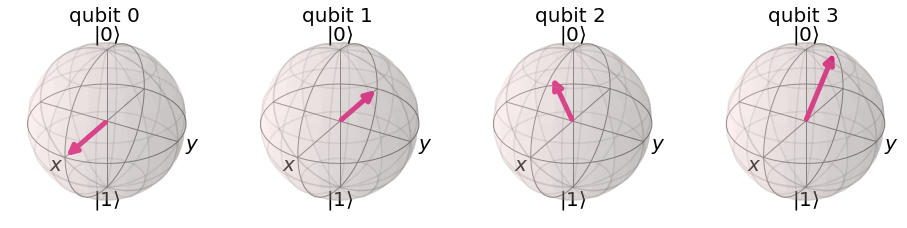

In [39]:
tests = [
    [1, 0],
    [0, 1],
    [sqrt(3/4), sqrt(1/4)],
    [sqrt(1/8), sqrt(7/8)]
]

plot_bloch_multivector(superposition_sv(tests))

##### check measurement for all tests

In [40]:
def measure_sv(initial_states):

    qc = QuantumCircuit(len(initial_states), len(initial_states))

    for index, state in enumerate(initial_states):
        qc.initialize(state, index)
        qc.h(index)
        qc.measure(index, index)

    qobj = assemble(qc)

    statevector = sv_simulator.run(qobj).result().get_statevector()

    return statevector



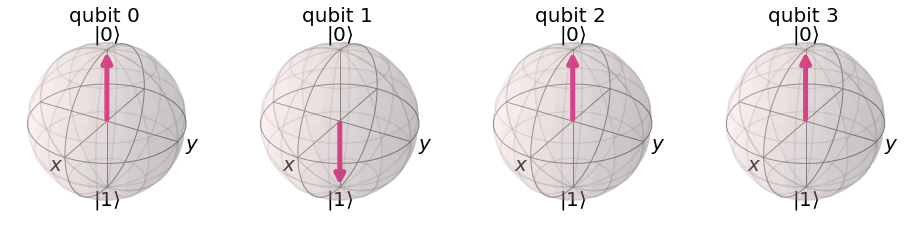

In [46]:
plot_bloch_multivector(
    measure_sv(
        tests
    )
)